In [1]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from HDF5DatasetGenerator import HDF5DatasetGenerator
import mlflow 
import torch
import torch.nn as nn

In [3]:
generator = HDF5DatasetGenerator('../data/structured/DISP_0_ANGLE_0/HDF5/a1TrainGenerator.hdf5',int(1e8))
data = next(generator.generator())

In [4]:
def save_npy(filename, data, keys):
    """
    Write a PHSP (Phase-Space) file in npy
    """

    dtype = []
    for k in keys:
        dtype.append((k, 'f4'))

    r = np.zeros(len(data), dtype=dtype)
    i = 0
    for k in keys:
        r[k] = data[:, i]
        i = i + 1

    np.save(filename, r)

In [5]:
save_npy('./../../GAGA/data/NOT_NORMALIZED_elekta_25.08.2021.npy',data,['Ekine', 'X', 'Y', 'dX', 'dY', 'dZ'])

In [3]:
keys = ['E', 'X', 'Y', 'dX', 'dY', 'dZ']

In [4]:
# histogram od min do max

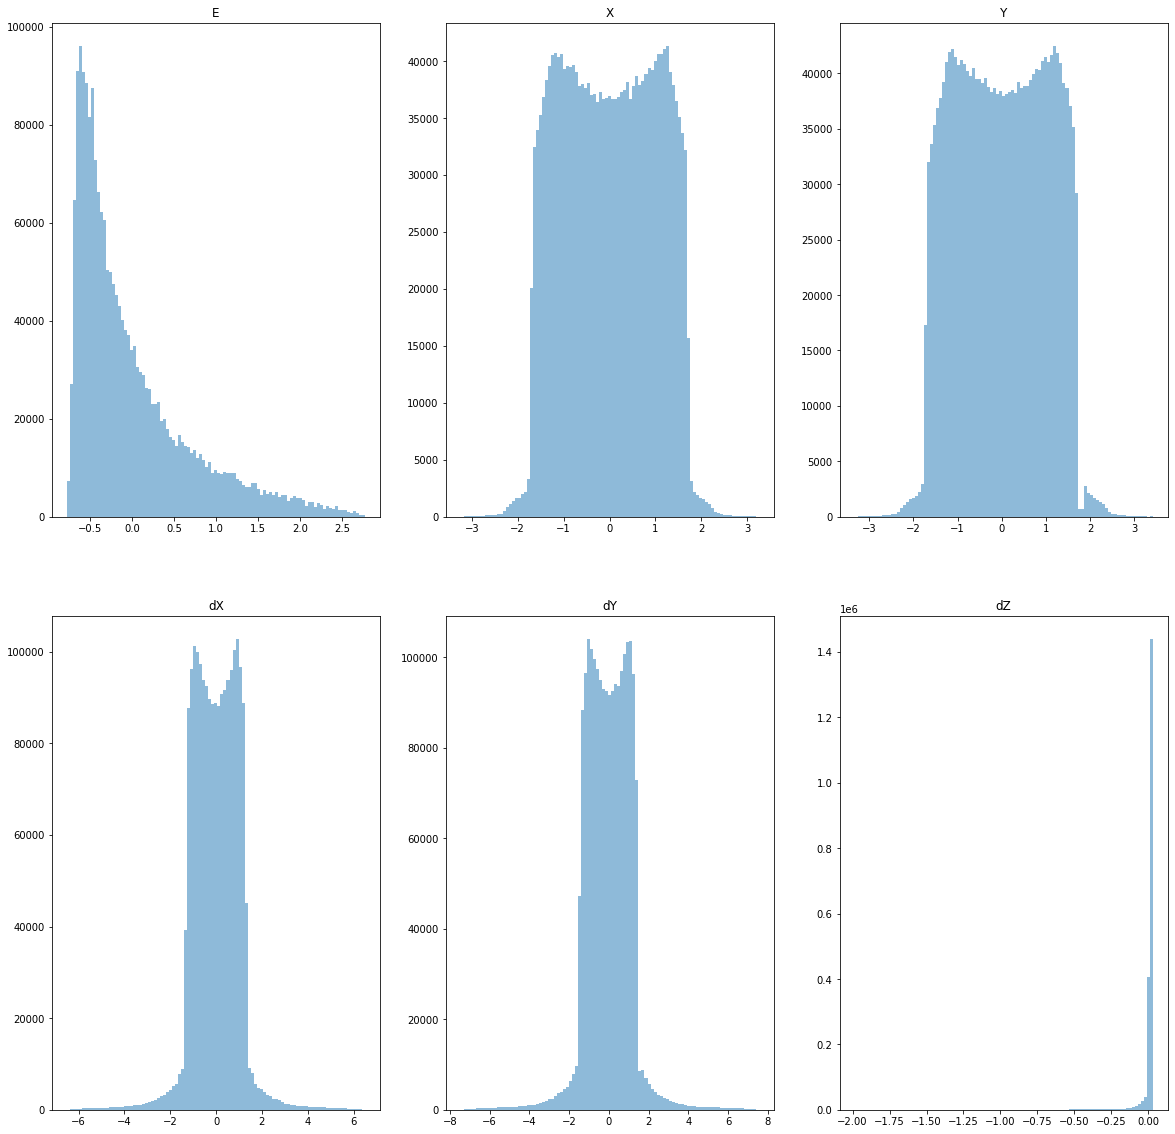

In [5]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    mi = data[:, i].min()
    ma = data[:, i].max()
    bins = np.linspace(mi, ma, 100)
    axs.flatten()[i].hist(data[:, i], bins, alpha=.5)
    axs.flatten()[i].set_title(j)

In [6]:
# histogram w granicach mean +/- 3*std

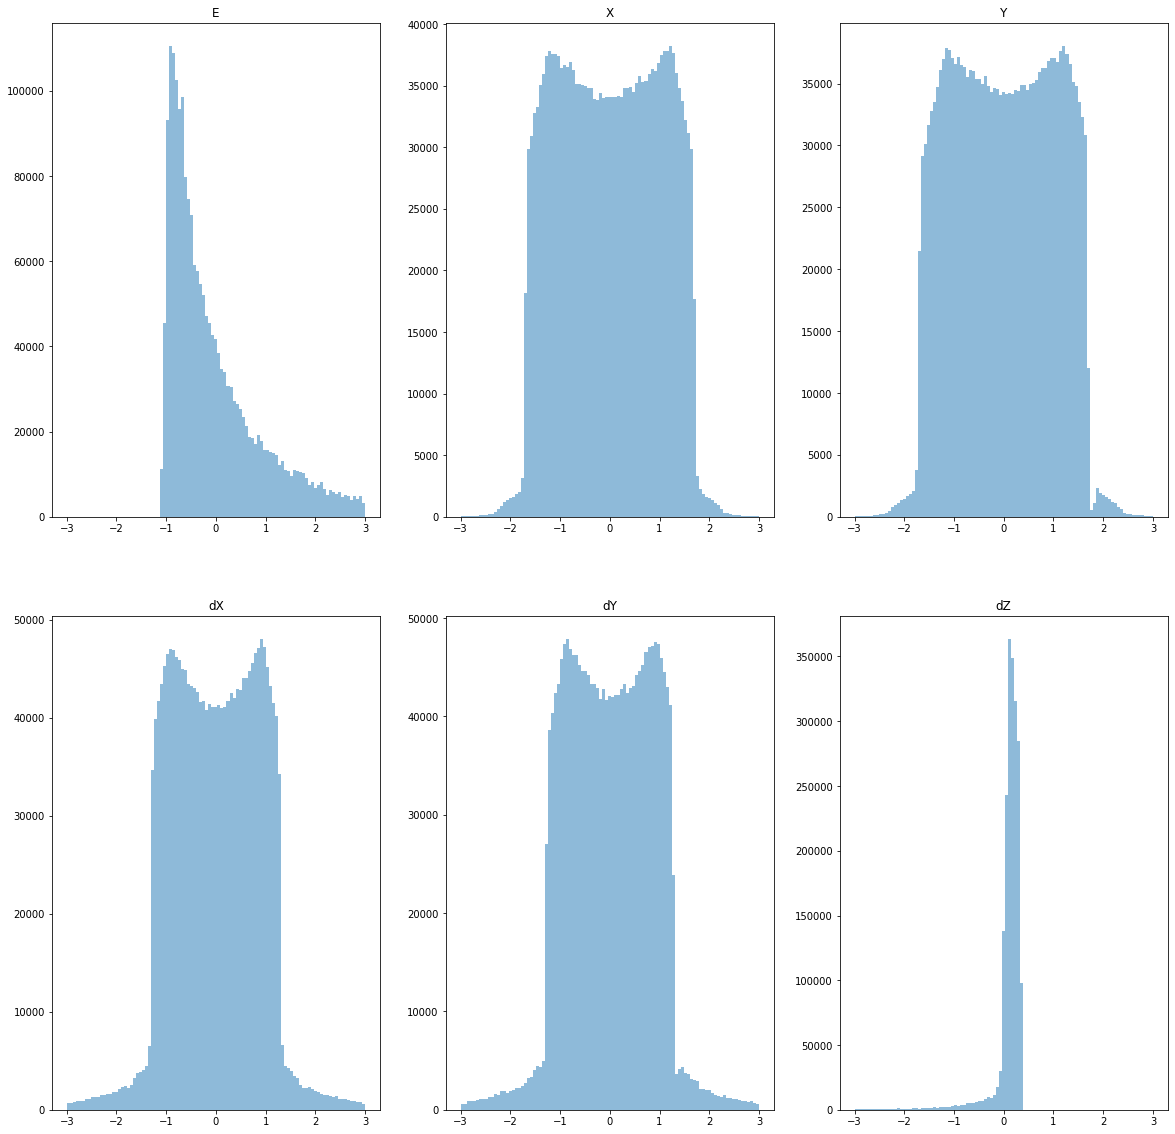

In [10]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
data2 = np.zeros(data.shape)
for i in range(data.shape[1]):
    data2[:,i] = (data[:,i]-np.mean(data[:,i]))/np.std(data[:,i])

for i, j in enumerate(keys):
    mi = data2[:,i].mean()-data2[:,i].std()*3
    ma = data2[:,i].mean()+data2[:,i].std()*3
    bins = np.linspace(mi, ma, 100)
    axs.flatten()[i].hist(data2[:, i], bins, alpha=.5)
    axs.flatten()[i].set_title(j)

In [8]:
#transformacja -> przesunięcie danych do 0, plus jeden, logarytm

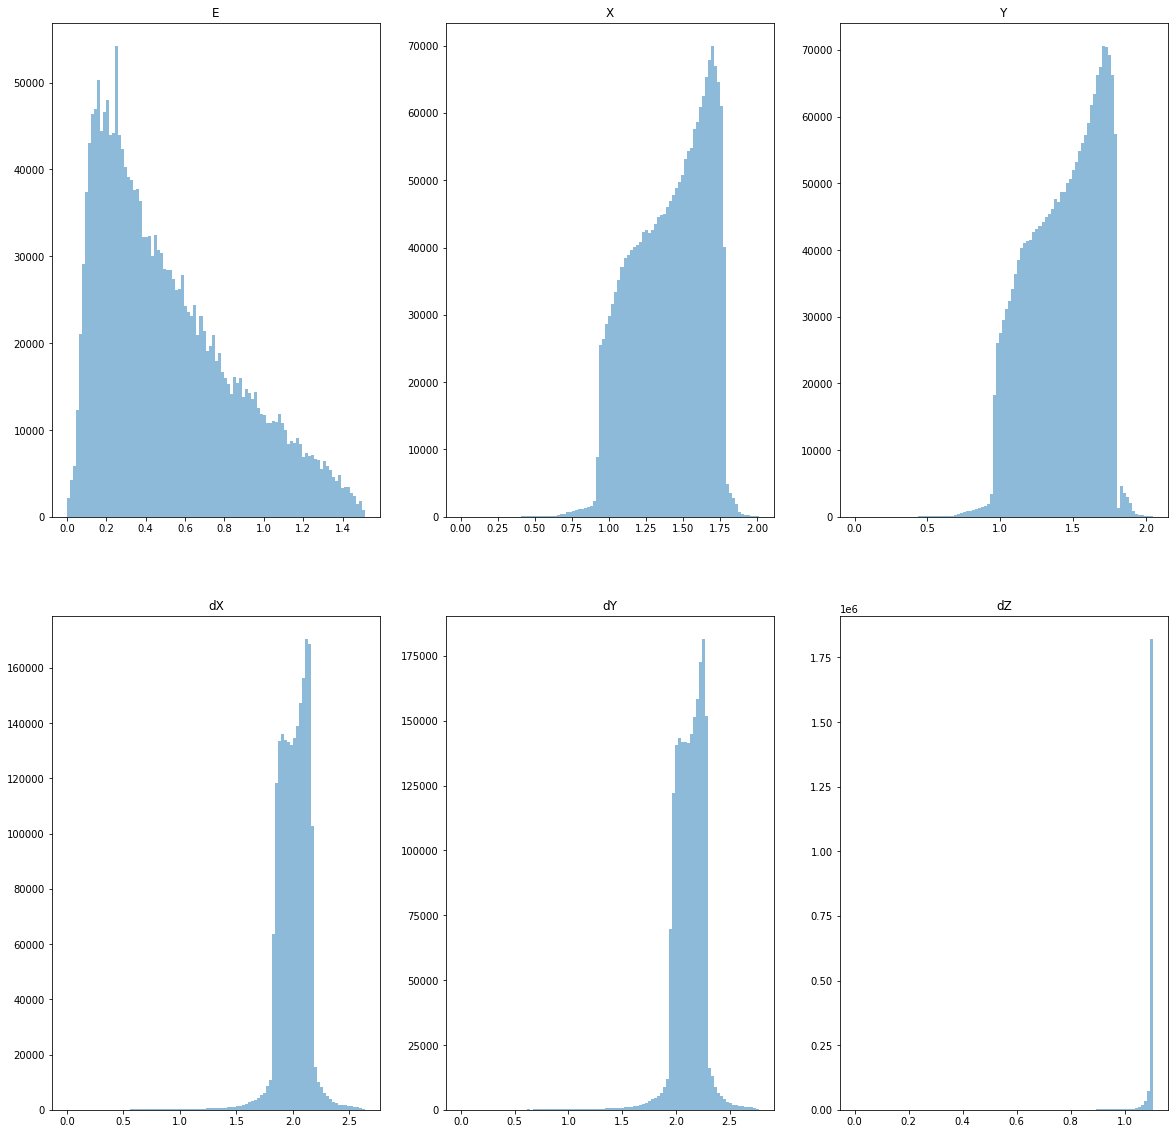

In [9]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    temp = data[:,i]
    transformed = np.log(temp + np.abs(temp.min())+1)
    mi = transformed.min()
    ma = transformed.max()
    bins = np.linspace(mi, ma, 100)
    axs.flatten()[i].hist(transformed, bins, alpha=.5)
    axs.flatten()[i].set_title(j)

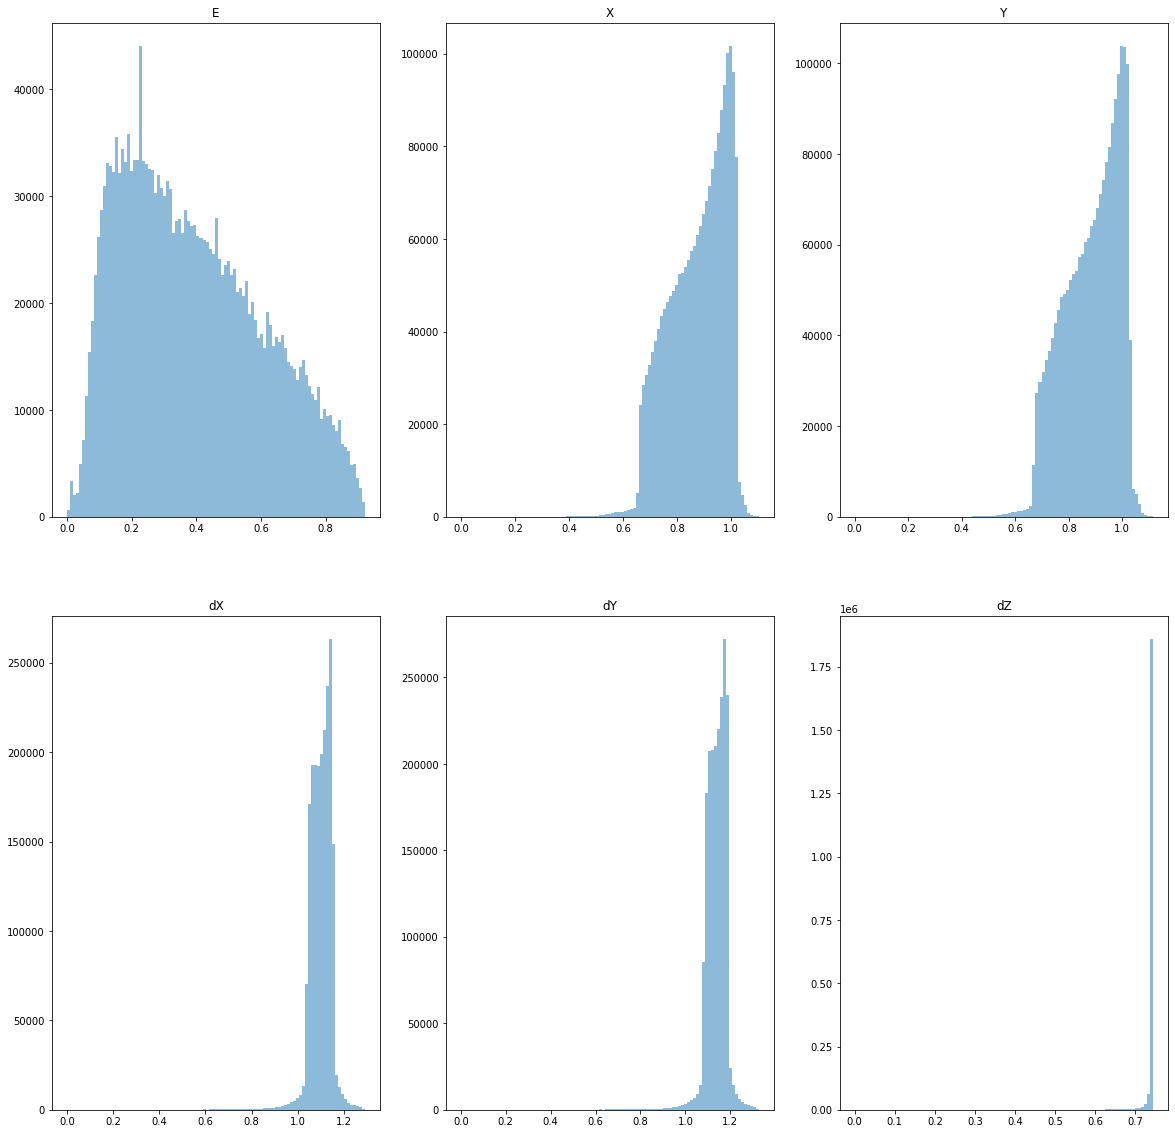

In [10]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    temp = data[:,i]
    transformed = np.log(np.log(temp + np.abs(temp.min())+1)+1)
    mi = transformed.min()
    ma = transformed.max()
    bins = np.linspace(mi, ma, 100)
    axs.flatten()[i].hist(transformed, bins, alpha=.5)
    axs.flatten()[i].set_title(j)

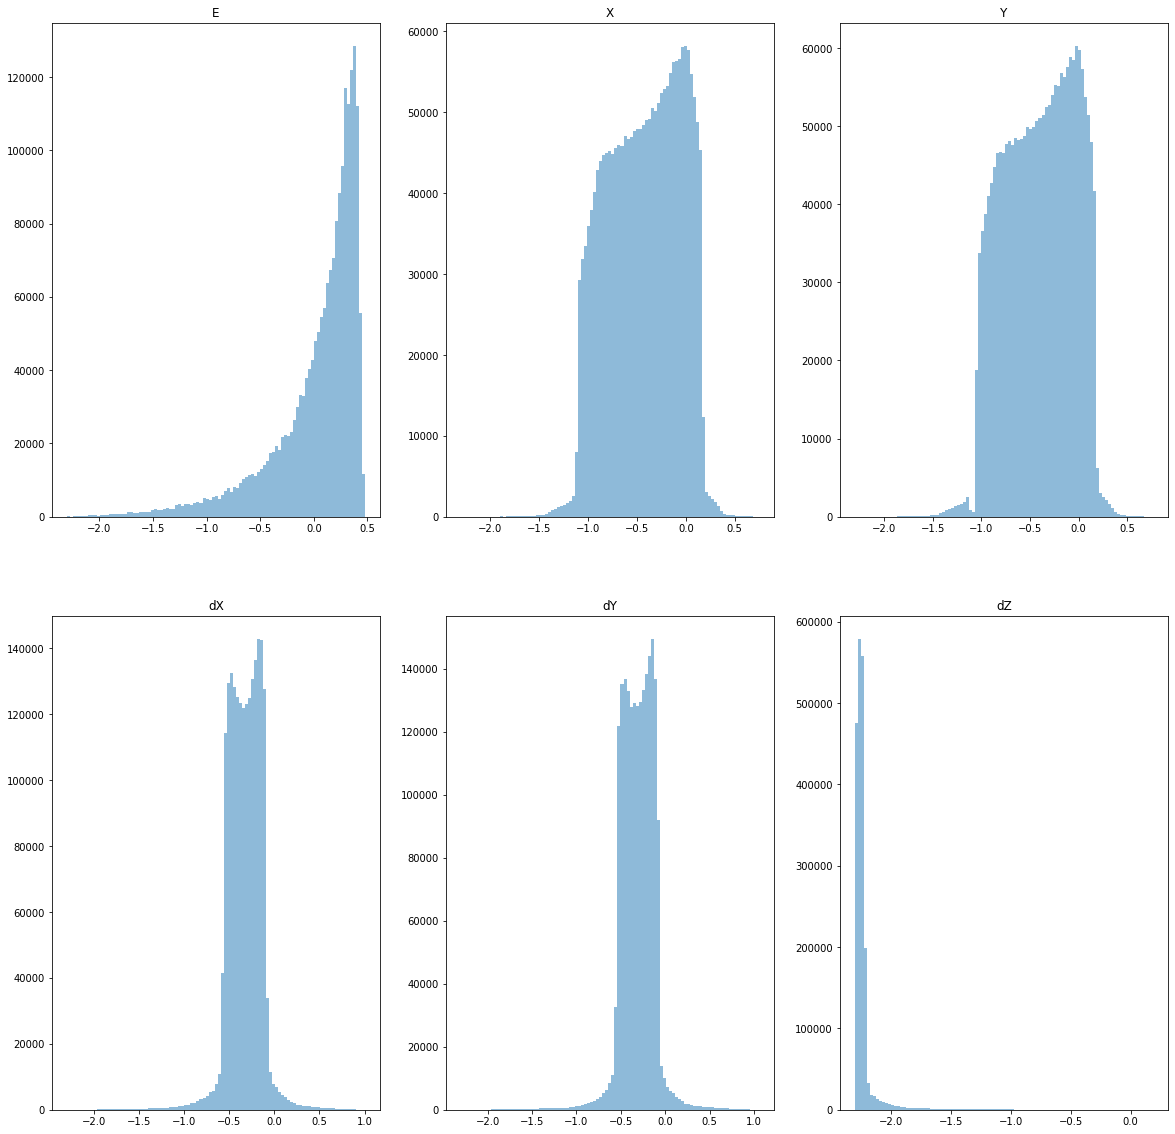

In [11]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
for i, j in enumerate(keys):
    temp = data[:,i]
    temp2 = np.log(temp + np.abs(temp.min())+1)
    transformed = np.log(-(temp2 - temp2.max())+.1)
    mi = transformed.min()
    ma = transformed.max()
    bins = np.linspace(mi, ma, 100)
    axs.flatten()[i].hist(transformed, bins, alpha=.5)
    axs.flatten()[i].set_title(j)

In [12]:
generator2 = HDF5DatasetGenerator('../data/a1TrainGenerator.hdf5',int(1e7))

In [13]:
mins = []
for it, i in enumerate(generator2.generator()):
    print(f'{it:03d}',end='\r')
    mins.append(cp.asnumpy(cp.array(i).min(axis=0)))

In [14]:
mins_all = np.concatenate([x.reshape((1,-1)) for x in mins],axis=0)
print(mins_all.min(axis=0))

[-0.80682707 -3.2696543  -3.3484402  -6.5231752  -7.4847455  -1.9898272 ]


In [15]:
to_transform = np.abs(mins_all.min(axis=0)) + 1

In [16]:
to_transform

array([1.8068271, 4.2696543, 4.34844  , 7.5231752, 8.484745 , 2.9898272],
      dtype=float32)

In [17]:
transormation_vector = np.array([1.8068271, 4.2696543, 4.34844  , 7.5231752, 8.484745 , 2.9898272]).reshape((1,-1))

In [18]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 20)
temp_t = data + transormation_vector
for i, j in enumerate(keys):
    transformed = np.log(temp_t[:,i])
    mi = transformed.min()
    ma = transformed.max()
    bins = np.linspace(mi, ma, 100)
    axs.flatten()[i].hist(transformed, bins, alpha=.5)
    axs.flatten()[i].set_title(j)

In [24]:
means = []
counts = []
for it, i in enumerate(generator2.generator()):
    print(f'{it:03d}',end='\r')
    ii = cp.array(i)
    temp_t = ii + cp.array(transormation_vector)
    transformed = cp.log(temp_t)
    means.append(cp.asnumpy(transformed.mean(axis=0)))
    counts.append(i.shape[0])

In [25]:
means_all = np.concatenate([x.reshape((1,-1)) for x in means],axis=0)
np.average(means_all,axis=0,weights=counts)

array([0.53090308, 1.42250118, 1.44145737, 2.00834152, 2.12836513,
       1.09497718])

In [26]:
torch.tensor([1,2]).num

tensor([1, 2])